In [355]:
import scipy
import scipy.linalg
from scipy.linalg import expm, norm, eigvals, solve
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [ ]:
1.

In [391]:
# Take one explicit Eulerstep
def eulerstep(A, uold, h):
    return uold + h*A.dot(uold)

# Approximate solution vector {y_j]_j using N expicit Euler steps
def eulerint(A, y0, t0, tf, N):
    approx = [y0]
    err = np.zeros([N,1])
    ts =  [t0 + k*(tf-t0)/N for k in range(N)]
    
    for i in range(1, N):
        approx.append(eulerstep(A, approx[i-1], (tf - t0)/N))
        err[i] = norm(approx[i] - expm(ts[i]*A).dot(y0), ord=2)
        
    return approx, err, ts

# Return a vector of global errors at final grid point corresponding to a
# set of different choices of amount of steps N. 
def errVSh(A, y0, t0, tf):
    Ns = [2**k for k in range(11)]
    errs = np.zeros(len(Ns))
    
    for i in range(len(Ns)):
        errs[i] = eulerint(A, y0, t0, tf, Ns[i])[1][-1]
        
    plt.loglog(Ns, errs, label=f'$A=\lambda={np.real((eigvals(A)))}$')
    plt.xlabel('$\log N$', fontsize=14)
    plt.ylabel('$\log e_N$', fontsize=14)
    plt.title('Global error $e_N$ at final step as a function of $N=2^k$', fontsize=18, y=1.025)
    plt.legend()
    plt.grid(True, which='both')
    
    return errs


In [360]:
# 1.2
A = np.array([[-10, 10], [0, -8]])
y0 = np.array([1, 1])
t0 = 0
tf = 10
N = 1000

approx, err, _ = eulerint(A, y0, t0, tf, N)

#print(approx[-1])
print(f'err = {err[-1]}')

err = [9.62942401e-35]


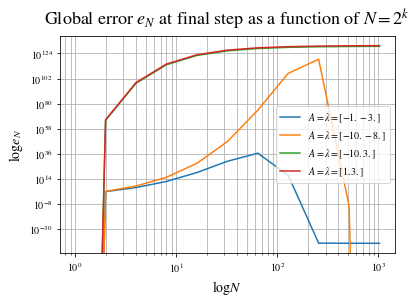

In [392]:
## 1.3 with errVSh

As = [np.array([[-1, 10], [0, -3]]), np.array([[-10, 10], [0, -8]]), 
      np.array([[-10, 10], [0, 3]]), np.array([[1, 10], [0, 3]])]

for A in As:
    errVSh(A, y0, t0, tf)

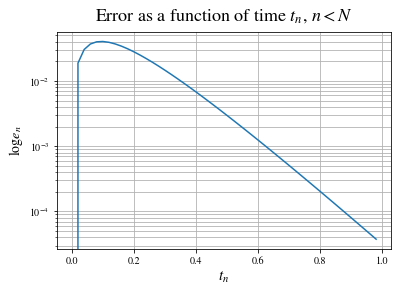

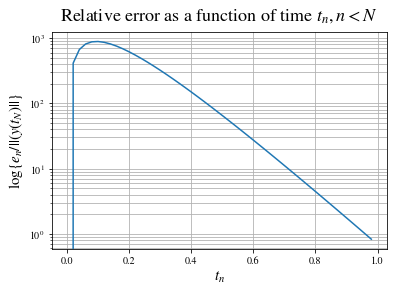

In [402]:
A = np.array([[-10]])
y0 = 1
t0 = 0
tf = 1
N = 50

_, err, ts = eulerint(A, y0, t0, tf, N) 

plt.plot(ts, err)
plt.title('Error as a function of time $t_n$, $n<N$', fontsize=18, y=1.025)
plt.yscale('log')
plt.xlabel('$t_n$', fontsize=15)
plt.ylabel('$\log e_n$', fontsize=14)
plt.grid(True, which='both')
plt.show();


err_rel = [e_n/norm(expm(tf*A).dot(y0), ord=2) for e_n in err]
plt.plot(ts, err_rel)
plt.title('Relative error as a function of time $t_n, n<N$', fontsize=18, y=1.025)
plt.yscale('log')
plt.xlabel('$t_n$', fontsize=15)
plt.ylabel('$\log \{e_n/ \|\| (y(t_N) \|\| \} $', fontsize=15)
plt.grid(True, which='both')
plt.show;


In [374]:
a = np.array([[3,1],[0,1]])
print(np.max(np.real((eigvals(a)))))

3.0


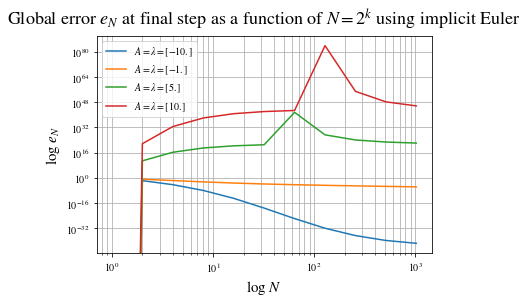

In [419]:
## Implicit Euler methods

# Take one implicit Eulerstep
def ieulerstep(A, uold, h):
    return solve(np.identity(A.shape[0]) - h*A, uold)

# Approximate solution vector {y_j]_j using N implicit Euler steps
def ieulerint(A, y0, t0, tf, N):
    approx = [y0]
    err = np.zeros([N,1])
    ts =  [t0 + k*(tf-t0)/N for k in range(N)]
    
    for i in range(1, N):
        approx.append(ieulerstep(A, approx[i-1], (tf - t0)/N))
        err[i] = norm(approx[i] - expm(ts[i]*A).dot(y0), ord=2)
        
    return approx, err, ts

# Return a vector of global errors at final grid point corresponding to a
# set of different choices of amount of steps N. 
def ierrVSh(A, y0, t0, tf):
    Ns = [2**k for k in range(11)]
    errs = np.zeros(len(Ns))
    
    for i in range(len(Ns)):
        errs[i] = ieulerint(A, y0, t0, tf, Ns[i])[1][-1]
        
    plt.loglog(Ns, errs, label=f'$A=\lambda={np.real((eigvals(A)))}$')
    plt.xlabel('$\log \ N$', fontsize=15)
    plt.ylabel('$\log \ e_N$', fontsize=15)
    plt.title('Global error $e_N$ at final step as a function of $N=2^k$ using implicit Euler', fontsize=18, y=1.025)
    plt.legend()
    plt.grid(True, which='both')
    
    return errs


if __name__ == "__main__":
    #A = np.array([[-1, 100], [0, -30]])
    A = np.array([[-1]])
    #y0 = np.array([1, 1])
    y0 = 1
    t0 = 0
    tf = 10
    Ns = [100, 1000]
    
    As = [np.array([[-10]]), np.array([[-1]]), np.array([[5]]), np.array([[10]])]

    for A in As:
        ierrVSh(A, y0, t0, tf)


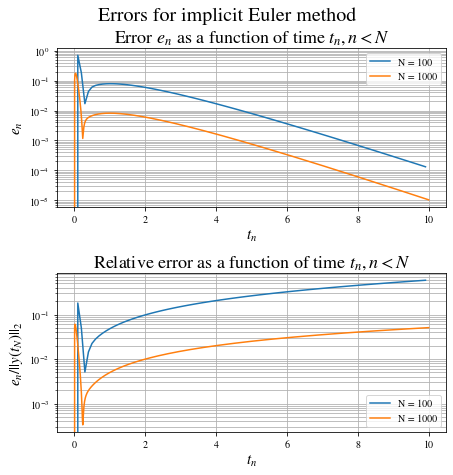

In [420]:
A = np.array([[-1, 100], [0, -30]])
y0 = np.array([1, 1])
t0 = 0
tf = 10
Ns = [100, 1000]
errs = [np.zeros(1), np.zeros(1)]
ts = [np.zeros(1), np.zeros(1)]

fig1, (ax1, ax2) = plt.subplots(nrows=2, figsize=[6.4, 6.4], tight_layout=True)
fig1.suptitle('Errors for implicit Euler method', fontsize=20, y=1.025)


for i in range(len(Ns)):
    # Calculate errors
    _, errs[i], ts[i] = ieulerint(A, y0, t0, tf, Ns[i]) 
    err_rel = [errs[i][j]/norm(expm(ts[i][j]*A).dot(y0),ord=2) for j in range(len(errs[i]))]
    
    # Plot
    fig1.tight_layout()
    
    ax1.plot(ts[i], errs[i], label=f'N = {Ns[i]}')
    ax1.set_yscale('log')
    ax1.set_title('Error $e_n$ as a function of time $t_n, n<N$', fontsize=18, y=1.025)
    ax1.set_xlabel('$t_n$', fontsize=15)
    ax1.set_ylabel('$e_n$', fontsize=15)
    ax1.legend()
    ax1.grid(True, which='both')
    
    ax2.plot(ts[i], err_rel, label=f'N = {Ns[i]}')
    ax2.set_yscale('log')
    ax2.set_title('Relative error as a function of time $t_n, n<N$', fontsize=18, y=1.025)
    ax2.set_xlabel('$t_n$', fontsize=15)
    ax2.set_ylabel('$e_n/ \|\| y(t_N) \|\|_2$', fontsize=15)
    ax2.legend()
    ax2.grid(True, which='both')

    
## Since implicit Euler has an unbounded stabilty region D (IE is A-stable),
## the solution is bounded for all values of the step size h, given that 
## all the eigenvalues of the matrix A has negative real parts (i.e. the 
## analytic solution to the ODE has a bounded solution). 

In [ ]:
2.

In [498]:
# (Explicit) RK4-method
def RK4(f, told, uold, h):
    Y1 = f(told, uold)
    Y2 = f(told + h/2, uold + h/2*Y1)
    Y3 = f(told + h/2, uold + h/2*Y2)
    Y4 = f(told + h, uold + h*Y3)
    
    return uold + h/6*(Y1 + 2*Y2 + 2*Y3+ Y4)


# Linear test equation class with useful methods. 
class lte():
    
    def __init__(self, l):
        self.l = l
        
    def set_l(self, l):
        self.l = l
        return self.l
    
    # Function f of the linear test equation
    def f(self, t, u):
        return self.l*u
    
    
# One step of the (embedded) pair method RK34: returns solution unew at 
# time t_n + h =t_n+1 and an estimate err of the local error. 
# Uses one step of extra (unneccesary) computing. 
def RK34step(f, told, uold, h):
    unew = RK4(f, told, uold, h)
    
    Y1 = f(told, uold)
    Y2 = f(told + h/2, uold + h/2*Y1)
    Z3 = f(told + h, uold -h*Y1 + 2*h*Y2)
    z = uold + h/6*(Y1 + 4*Y2 + Z3)
    
    return unew, z - unew

def RK34step_fast(f, told, uold, h):
    return


# Return new step size such that the error tol is obtained
def newstep(tol, err, errold, hold, k):
    return (tol/err)**(2/(3*k)) * (tol/errold)**(-1/(3*k)) * hold   


# Lotka-Volterra class
class LV():
    
    # Parameters params for LV equation has to be in 
    # the form [a, b, c, d].
    def __init__(self, params):
        self.params = params
    
    def set_params(self, params):
        self.params = params
        return self.params
        
    # Lotka-Volterra equation.
    # u is a 2 x len(x) np.array (where u = [x, y], x is len(x) x 1) for 
    # any j=1,2, and 'u*u' is the element-wise product. 
    def dudt(self, t, u):
        return np.array([self.params[0]*u[0] - self.params[1]*u[0]*u[1],
                        self.params[2]*u[0]*u[1] - self.params[3]*u[1]])
    
    # Return the value of the function H
    # x, y lists of floats
    def H(self, x, y):
        return self.params[2]*np.array(x) + self.params[1]*np.array(y) - self.params[3]*np.log(np.array(x)) - self.params[0]*np.log(np.array(y))
    
    
# Solve y'=f(t,y) using adaptive embedded RK34. 
# f is a function returning a np.ndarray, the IV u0 a list of floats,
# time interval boundaries t0, tf, and error tolerance tol. 
# Returns a list of (time) grid points and a 2xN array (N=len(x)), each
# row corresponding to the numerical solution y_n, x_n for all n<=N
# (i.e. function values on the grid). 
def adaptiveRK34(f, t0, tf, u0, tol, count_steps=False):    
    k = 4
    t = [t0]
    u =  [np.array(u0)]
    err = [tol]
    h = [np.abs(tf - t0) * tol**(1/4) / 
                  (100 * (1 + norm(f(t0, u[0]), ord=2))) / 100]
    
    # Solution for every step except for last: however prepare step 
    # h_final = tf - t[-1]. 
    while t[-1] + h[-1] < tf:
        unew, errnew = RK34step(f, t[-1], u[-1], h[-1])
        errnew = norm(errnew, ord=2)
        t.append(t[-1]+h[-1])
        
        # Calculate hnew and see if t[-1] + hnew < tf, else
        # take hnew as the remaining distance to tf.  
        hnew = newstep(tol, errnew, err[-1], h[-1], k)
        if t[-1] + hnew > tf:
            hnew = tf - t[-1]
        
        # Append calculations to the arrays
        u = np.vstack((u, unew))
        err.append(errnew)
        h.append(hnew)
    
    # Final step: don't do unnecessary calculations 
    unew, _ = RK34step(f, t[-1], u[-1], h[-1])
    t.append(tf)
    u = np.vstack((u, unew))
    
    if count_steps: 
        return t, u.T, len(h)     
    return t, u.T

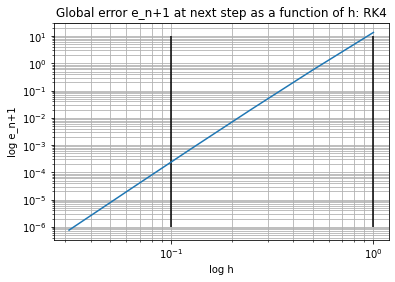

In [123]:
# 2.1 with implementation of RK4 and lte (f)

# Constants
y0 = 1
t0 = 0
hs = [2**-k for k in range(0,6)]

# Create linear test equation object
eq = lte(-5) 

# Calculate errors e_n+1 from using RK4
errs = np.zeros([len(hs),1])

for i in range(len(hs)):
    y1 = RK4(eq.f, t0, y0, hs[i])
    errs[i] = norm(np.array([y1]) - np.array([np.exp((t0+hs[i])*eq.l)*y0]), ord=2)

plt.loglog(hs, errs)
plt.vlines([10**(-1), 1], ymin=10**(-6), ymax=10)
plt.xlabel('log h')
plt.ylabel('log e_n+1')
plt.title('Global error e_n+1 at next step as a function of h: RK4')
plt.grid(True, which='both')


In [ ]:
## 2.2: implementation of RK34.

In [ ]:
## 2.3 implementation of newstep

In [ ]:
## 2.4 implementation of adaptiveRK34

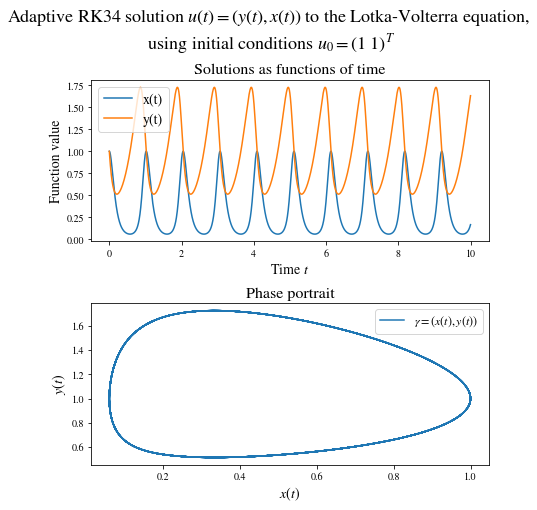

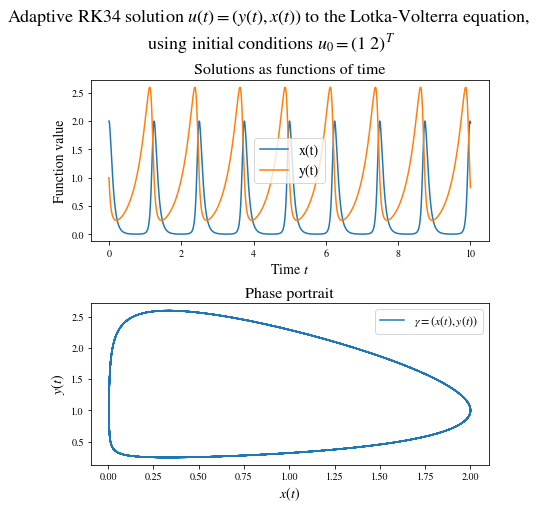

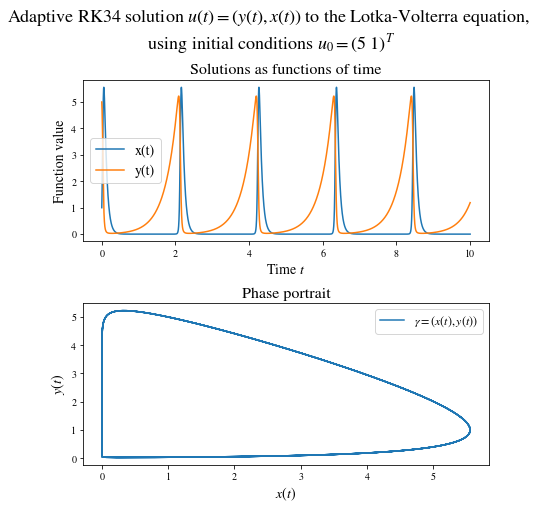

In [486]:
## 3.1 impl. of Lotka-Volterra class and using it with RK34
params = [3, 9, 15, 15]
u0s = [[1, 1], [1, 2], [5, 1]]
tol = 1e-8
t0 = 0
tf = 10
eq = LV(params)

for u0 in u0s:
    # Solve the Lotka-Volterra equation for a given IV u0 
    t, (y, x) = adaptiveRK34(eq.dudt, t0, tf, u0, tol)

    # Plot solutions as a function of time and as phase portrait
    fig1, (ax1, ax2) = plt.subplots(nrows=2, figsize=[6.4, 6.4], tight_layout=True)
    fig1.suptitle(f'Adaptive RK34 solution $u(t) = (y(t), x(t))$ to the Lotka-Volterra equation, \n using initial conditions $u_0 = ({u0[0]} \ {u0[1]})^T$', 
                  fontsize=18, y=1.1)
    fig1.tight_layout()

    ax1.plot(t, x, label='x(t)')
    ax1.plot(t, y, label='y(t)')
    ax1.set_xlabel('Time $t$', fontsize=14)
    ax1.set_ylabel('Function value', fontsize=14)
    ax1.legend(fontsize=14)
    ax1.set_title('Solutions as functions of time', fontsize=16)

    ax2.plot(x, y, label='$\gamma = (x(t), y(t))$')
    ax2.set_xlabel('$x(t)$', fontsize=14)
    ax2.set_ylabel('$y(t)$', fontsize=14)
    ax2.legend(fontsize=12)
    ax2.set_title('Phase portrait', fontsize=16)

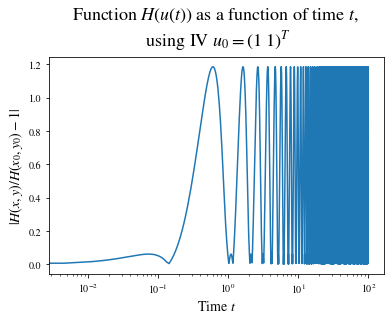

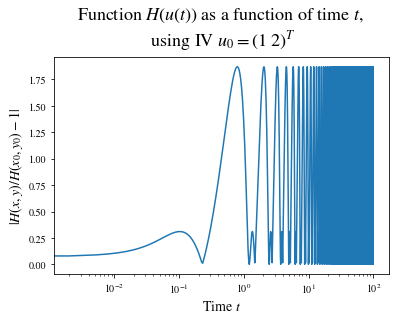

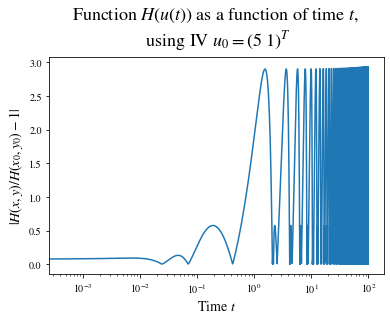

In [384]:
## 3.1 Investigate whether H(u) is constant
tol = 1e-6
t0 = 0
tf = 100

for u0 in u0s:
    t, (y, x) = adaptiveRK34(eq.dudt, t0, tf, u0, tol)

    plt.plot(t, np.abs(eq.H(x, y)/eq.H(*u0) - 1))
    plt.xscale('log')
    plt.xlabel('Time $t$', fontsize=14)
    plt.ylabel('$\| H(x,y)/H(x_0, y_0) - 1 \|$', fontsize=14);
    plt.title(f'Function $H(u(t))$ as a function of time $t$, \n using IV $u_0 = ({u0[0]} \ {u0[1]})^T$', fontsize=18, y=1.025);
    plt.show()

In [428]:
# van der Pol equation class: mu real parameter
class vdP():
    
    def __init__(self, mu=100):
        self.mu = mu
        
    def set_mu(self, mu):
        self.mu = mu
    
    # Function f=y' of the vdP equation
    def dudt(self, t, y):
        return np.array([y[1], self.mu*(1-y[0]**2)*y[1] - y[0]])

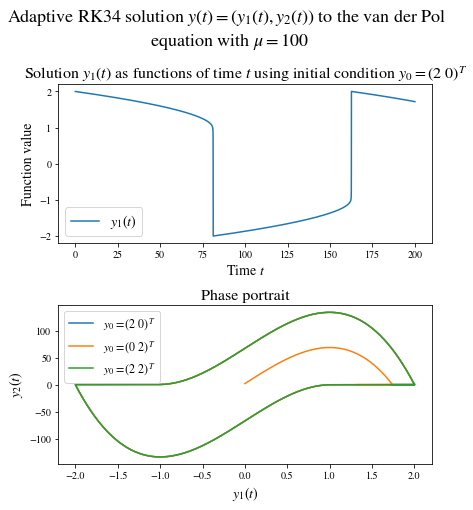

In [483]:
#4.1 

# Constants
mu = 100
y0s = [[2, 0], [0, 2], [2, 2]]
t0 = 0
tf = 2*mu
tol = 1e-6
eq = vdP(mu)

# Prepare for plot
fig1, (ax1, ax2) = plt.subplots(nrows=2, figsize=[6.4, 6.4], tight_layout=True)
fig1.suptitle(f'Adaptive RK34 solution $y(t) = (y_1(t), y_2(t))$ to the van der Pol \n equation with $\mu={mu}$', 
                fontsize=18, y=1.1)
fig1.tight_layout()

# Solve the vdP equation using adaptive RK34 and 
# different initial conditions y0.
for y0 in y0s:
    t, (y1, y2) = adaptiveRK34(eq.dudt, t0, tf, y0, tol)  
    
    # Plot solutions as a function of time and as phase portrait
    if y0 == [2, 0]:
        ax1.plot(t, y1, label='$y_1(t)$')
        ax1.set_xlabel('Time $t$', fontsize=14)
        ax1.set_ylabel('Function value', fontsize=14)
        ax1.legend(fontsize=14)
        ax1.set_title(f'Solution $y_1(t)$ as functions of time $t$ using initial condition $y_0 = ({y0[0]} \   {y0[1]})^T$', fontsize=16)
    
    ax2.plot(y1, y2, label=f'$y_0 = ({y0[0]} \ {y0[1]})^T$')
    ax2.set_xlabel('$y_1(t)$', fontsize=14)
    ax2.set_ylabel('$y_2(t)$', fontsize=14)
    ax2.legend(fontsize=12)
    ax2.set_title('Phase portrait', fontsize=16)
